In [1]:
# Get required libraries 
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

In [3]:
train = (pd.read_csv("./Dataset/final.csv"))

In [19]:
train.head()
train.shape
train.count()
train['Activity'].value_counts()

Down     51
Forth    51
Right    51
Left     41
Up       40
Name: Activity, dtype: int64

In [20]:
train.count()

Activity    234
ACC X       234
ACC Y       234
ACC Z       234
GYRO X      234
GYRO Y      234
GYRO Z      234
dtype: int64

<AxesSubplot:xlabel='ACC X', ylabel='ACC Y'>

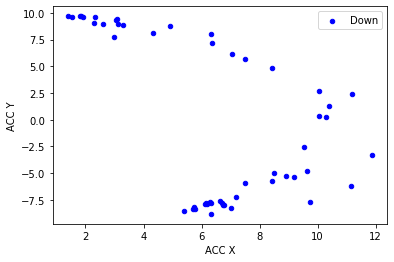

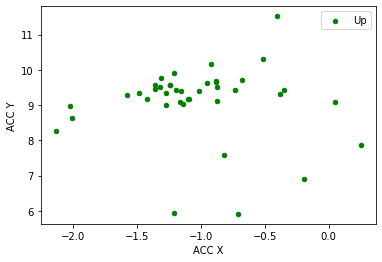

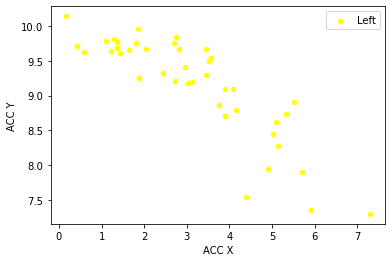

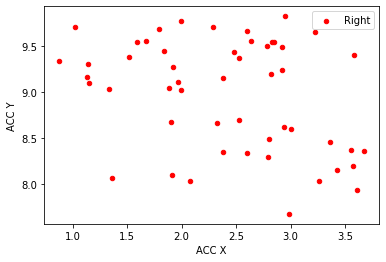

In [22]:
Down.plot(kind='scatter', x='ACC X', y='ACC Y', color= 'blue', label='Down')
Up.plot(kind='scatter', x='ACC X', y='ACC Y', color= 'Green', label='Up')
Left.plot(kind='scatter', x='ACC X', y='ACC Y', color= 'yellow', label='Left')
Right.plot(kind='scatter', x='ACC X', y='ACC Y', color= 'red', label='Right')

<AxesSubplot:xlabel='ACC X', ylabel='ACC Y'>

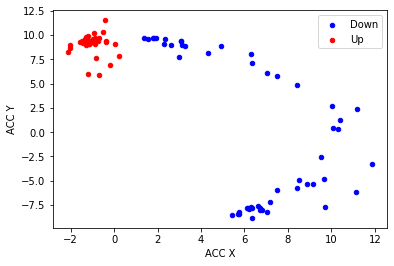

In [23]:
axes= Down.plot(kind='scatter', x='ACC X', y='ACC Y', color= 'blue', label='Down')
Up.plot(kind='scatter', x='ACC X', y='ACC Y', color= 'red', label='Up', ax= axes)

In [4]:
Down = train[train['Activity'] == 'Down'][0:230]
Right = train[train['Activity'] == 'Right'][0:230]
Forth = train[train['Activity'] == 'Forth'][0:230]
Left = train[train['Activity'] == 'Left'][0:230]
Up = train[train['Activity'] == 'Up'][0:230]

In [5]:
features= train[['ACC X', 'ACC Y', 'ACC Z', 'GYRO X', 'GYRO Y', 'GYRO Z']]
X= np.asarray(features)

In [6]:
Y= np.asarray(train['Activity'])

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [8]:
classifier = SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, Y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [9]:
Y_predict =classifier.predict(X_test)

In [10]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

        Down       1.00      0.90      0.95        10
       Forth       0.80      0.92      0.86        13
        Left       1.00      0.50      0.67        10
       Right       0.55      0.86      0.67         7
          Up       1.00      1.00      1.00         7

    accuracy                           0.83        47
   macro avg       0.87      0.84      0.83        47
weighted avg       0.88      0.83      0.83        47



In [11]:
Y_predict =classifier.predict(X_test)

In [12]:
print(Y_predict)

['Right' 'Right' 'Right' 'Forth' 'Right' 'Forth' 'Forth' 'Left' 'Down'
 'Up' 'Up' 'Right' 'Right' 'Up' 'Forth' 'Left' 'Down' 'Down' 'Up' 'Down'
 'Forth' 'Forth' 'Right' 'Right' 'Left' 'Left' 'Forth' 'Right' 'Down'
 'Forth' 'Down' 'Down' 'Down' 'Left' 'Forth' 'Right' 'Forth' 'Up' 'Down'
 'Forth' 'Up' 'Right' 'Forth' 'Forth' 'Forth' 'Up' 'Forth']


Done with the training of the model

Now save the Model for later use


In [13]:
import joblib

In [14]:
joblib.dump(classifier, "model.pkl")

['model.pkl']

Done with the Model Saving...


Now will load saved Model and Will test it By givent some Random data

In [15]:
loaded_model = joblib.load('model.pkl')

In [16]:
testing = (pd.read_csv("./Dataset/testdata.csv"))

In [17]:
predictions = loaded_model.predict(testing)

In [18]:
print(predictions)

['Right' 'Down' 'Down' 'Down' 'Down' 'Down' 'Down' 'Up']
